# Overview


    
### Carryout the necessary analysis to answer the under-listed-questions:
    
    1. Whether there are more burglaries in more affluent areas
    2. Burglaries are increasing, decreasing, or are stable
    



## 1 Introduction: The Crime Analysis task ..._Markdown_, **10 Marks**, Max 300 Words

This section should be written in markdown.

    1. Give the background to the "Burglary Protection" project. Use the academic literature to motivate the work.
    2. Give the aims and objectives of the project in your own words. (Do not copy the assignment spec)
    3. Outline the technical approach (what you plan to do)

Burglary is a significant and pervasive issue that has an impact on both individuals and society. Victims suffer severe economic, social, and psychological harm, and residents frequently feel uneasy and afraid as a result. According to studies, burglary is a frequent and serious crime problem in many nations. For instance, burglary is one of the most prevalent types of domestic crime in the United Kingdom, with an anticipated 356,017 cases reported in 2020 (ONS, 2021).

The academic literature offers several methods for preventing burglaries. Target hardening is one strategy that involves making homes less appealing to criminals by enhancing their physical security. The installation of locks, alarms, and CCTV cameras, as well as the reinforcement of doors, windows, and other entry points, are examples of target-hardening techniques (Ekblom, 1997). To detect and address criminal issues, community policing is a strategy that combines cooperation between law enforcement and locals. To better prevent crime and respond to criminal behavior, community policing can foster trust and cooperation between the police and the community (Rosenbaum et al., 1994).

To get an understanding of burglary crime, an analytical approach will be introduced in this study. The UK Home Office's Street Level Crime Data, which contains 19 million data rows with a crime type, location as a latitude and longitude, and time of occurrence, will be analyzed.


Aim

This project aims to use Apache Spark on an Azure VM cloud server to analyze a crime dataset and acquire insight, identify patterns, trends, and hotspots of burglary activity to aid in the customer target audience the overall decision-making.


Objectives

The study aim can only be accomplished if the specific objectives under-listed are followed closely and met successfully: 

1.Set up an Azure Virtual Machine and Apache Spark for the analytical procedure. 

2.Conduct data preparation and transformation on the dataset. 

3.Analyze the dataset and derive a conclusion. 

4.Visualize the findings.


Technical Procedure

1.Gathering requirements: This step entails preparing the environment for the analysis by installing all required software and packages, including Spark, Python, and Jupyter Notebook. Since the implementation would take place on Azure Infrastructure, a virtual machine would likely be used for the installation so there are enough resources.

2.Data collection: This step entails downloading the necessary dataset from different reliable sources.

3.Data preparation and transformation: This procedure entails cleaning the dataset to make sure it is free of errors and does not contain any missing values. Another collection of datasets focusing on information will be created by extracting various subsets from the clean dataset. With the use of Microsoft Excel and Power BI and Python. E.g., extracting only crime in Bulgary, can be used to form another dataset. 

4.Data analysis: This process involves extracting insights and information from the dataset. Pyspark which comprises python and Spark will be used to achieve this.

5.Visualizing my findings for easy understanding so it makes sense to stakeholders.


## 2) Component Selection and Data Pipeline Implementation _code_	

In this section you i have one more code cells. These include your library imports. I accessed the data efficiently using Apache Spark on a cloud Infrastructure as a Service (IaaS) platform. 



In [1]:
#Importing the required libraries 

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import  col,desc, to_date, count, when, sum as py_sum, split, avg,asc
from pyspark.sql.functions import col, when
import statsmodels.api as sm
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [62]:
# create a SparkSession object
spark= SparkSession.builder.appName('KF_Assignment').getOrCreate()

In [3]:
#Confirming there is a spark context: Should show the spark version and app name
spark_context = spark.sparkContext

In [4]:
spark_context 

<SparkContext master=local[*] appName=KF_Assignment>

In [5]:
# read the all_crime dataset file into a DataFrame 
df_crimes = spark.read.csv("all_crimes21_hdr.txt.gz", header="true",inferSchema="true")


In [6]:
# display the first 20 rows of the DataFrame
df_crimes.show()

+--------+-------------------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|Crime ID|              Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------+-------------------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|    null|2010-12-01 00:00:00|Avon and Somerset...|Avon and Somerset...|  -0.8056|51.819143|On or near Norfol...|E01017662| Aylesbury Vale 015C|         Other crime|                 null|   null|
|    null|2010-12-01 00:00:00|Avon and Somerset...|Avon and Somerset...|-2.494366|51.418169|On or near Keynsh...|E01014399|Bath and North Ea...|Anti-social behav...|                 null|   null|
|    null|2010-12-01

In [7]:
df_crimes.columns

['Crime ID',
 'Month',
 'Reported by',
 'Falls within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Crime type',
 'Last outcome category',
 'Context']

## 3) Data Extraction and Filtering ... _code_
### includes System running, test and diagnostics, 



### 1.	Filter the dataset so that crimes refer to Burglary only

### 2.  To see whether burglaries are increasing, you will also need to extract the burglaries as a time series.



In [8]:
# Print(This Displays My Inferred Schema)
df_crimes.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: timestamp (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [9]:
# Select Only The Required Columns
df_crimes_filt=df_crimes.select("Crime type","LSOA code","LSOA name","Reported by","location","Month")

df_crimes_filt.show(10)

+--------------------+---------+--------------------+--------------------+--------------------+-------------------+
|          Crime type|LSOA code|           LSOA name|         Reported by|            location|              Month|
+--------------------+---------+--------------------+--------------------+--------------------+-------------------+
|         Other crime|E01017662| Aylesbury Vale 015C|Avon and Somerset...|On or near Norfol...|2010-12-01 00:00:00|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Keynsh...|2010-12-01 00:00:00|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010-12-01 00:00:00|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Orchar...|2010-12-01 00:00:00|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010-12-01 00:00:00|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset..

In [10]:
#Split,Drop The Month Column And Create A Year Column

df_crimes_filt=df_crimes_filt.withColumn('Year',split(col('Month'),'-').getItem(0)).drop ("Month")

df_crimes_filt.show(10)

+--------------------+---------+--------------------+--------------------+--------------------+----+
|          Crime type|LSOA code|           LSOA name|         Reported by|            location|Year|
+--------------------+---------+--------------------+--------------------+--------------------+----+
|         Other crime|E01017662| Aylesbury Vale 015C|Avon and Somerset...|On or near Norfol...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Keynsh...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Orchar...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010|
|            Burglary|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Charlt

In [11]:
df_crimes_filt.columns

['Crime type', 'LSOA code', 'LSOA name', 'Reported by', 'location', 'Year']

In [12]:
df_crimes_filt=df_crimes_filt.select('Crime type','LSOA code','LSOA name','Reported by','location','Year')




In [13]:
df_crimes_filt.show()

+--------------------+---------+--------------------+--------------------+--------------------+----+
|          Crime type|LSOA code|           LSOA name|         Reported by|            location|Year|
+--------------------+---------+--------------------+--------------------+--------------------+----+
|         Other crime|E01017662| Aylesbury Vale 015C|Avon and Somerset...|On or near Norfol...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Keynsh...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Orchar...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010|
|Anti-social behav...|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Harlec...|2010|
|            Burglary|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Charlt

In [14]:
#showing all crimes available in the dataset

df_crimes_filt.select('Crime type').distinct().show()

+--------------------+
|          Crime type|
+--------------------+
|       Bicycle theft|
|        Public order|
|               Drugs|
|Public disorder a...|
|         Other crime|
|             Robbery|
|Criminal damage a...|
|Theft from the pe...|
|         Shoplifting|
|            Burglary|
|       Violent crime|
|         Other theft|
|Possession of wea...|
|Violence and sexu...|
|       Vehicle crime|
|Anti-social behav...|
+--------------------+



In [15]:
df_crimes_filt_yr = df_crimes_filt.groupBy('Crime type').agg(count('*').alias('count'))



In [16]:
df_crimes_filt_yr.show()

+--------------------+--------+
|          Crime type|   count|
+--------------------+--------+
|       Bicycle theft|  735689|
|        Public order| 2564695|
|               Drugs| 1682486|
|Public disorder a...|  242145|
|         Other crime| 2565111|
|             Robbery|  696008|
|Criminal damage a...| 5343182|
|Theft from the pe...|  714621|
|         Shoplifting| 3227557|
|            Burglary| 4350252|
|       Violent crime| 1673219|
|         Other theft| 5206259|
|Possession of wea...|  283189|
|Violence and sexu...|11411540|
|       Vehicle crime| 4170769|
|Anti-social behav...|20211528|
+--------------------+--------+



In [17]:

df_crimes_filt_yr = df_crimes_filt_yr .toPandas()

In [18]:
df_crimes_filt_yr.head()

,Crime type,count
0,Bicycle theft,735689
1,Public order,2564695
2,Drugs,1682486
3,Public disorder and weapons,242145
4,Other crime,2565111


In [19]:
#filtering and assigning only Burglary crime into a different dataframe

    
df_crimes_Burglary = df_crimes_filt.filter((col("Crime type") =='Burglary'))



In [20]:
#showing first 10 of selected crimes (Burglary)
df_crimes_Burglary.limit(10).toPandas()

,Crime type,LSOA code,LSOA name,Reported by,location,Year
0,Burglary,E01014399,Bath and North East Somerset 001A,Avon and Somerset Constabulary,On or near Charlton Road,2010
1,Burglary,E01014399,Bath and North East Somerset 001A,Avon and Somerset Constabulary,On or near St. Francis Road,2010
2,Burglary,E01014400,Bath and North East Somerset 001B,Avon and Somerset Constabulary,On or near Back Lane,2010
3,Burglary,E01014400,Bath and North East Somerset 001B,Avon and Somerset Constabulary,On or near High Street,2010
4,Burglary,E01014400,Bath and North East Somerset 001B,Avon and Somerset Constabulary,On or near High Street,2010
5,Burglary,E01014400,Bath and North East Somerset 001B,Avon and Somerset Constabulary,On or near West View Road,2010
6,Burglary,E01014402,Bath and North East Somerset 002A,Avon and Somerset Constabulary,On or near Birch Court,2010
7,Burglary,E01014403,Bath and North East Somerset 002B,Avon and Somerset Constabulary,On or near Temple Street,2010
8,Burglary,E01014403,Bath and North East Somerset 002B,Avon and Somerset Constabulary,On or near Temple Street,2010
9,Burglary,E01014404,Bath and North East Somerset 002C,Avon and Somerset Constabulary,On or near Lulworth Road,2010


In [21]:
#showing only the first 10 Burglary crime in the dataset
df_crimes_Burglary.show(10)

+----------+---------+--------------------+--------------------+--------------------+----+
|Crime type|LSOA code|           LSOA name|         Reported by|            location|Year|
+----------+---------+--------------------+--------------------+--------------------+----+
|  Burglary|E01014399|Bath and North Ea...|Avon and Somerset...|On or near Charlt...|2010|
|  Burglary|E01014399|Bath and North Ea...|Avon and Somerset...|On or near St. Fr...|2010|
|  Burglary|E01014400|Bath and North Ea...|Avon and Somerset...|On or near Back Lane|2010|
|  Burglary|E01014400|Bath and North Ea...|Avon and Somerset...|On or near High S...|2010|
|  Burglary|E01014400|Bath and North Ea...|Avon and Somerset...|On or near High S...|2010|
|  Burglary|E01014400|Bath and North Ea...|Avon and Somerset...|On or near West V...|2010|
|  Burglary|E01014402|Bath and North Ea...|Avon and Somerset...|On or near Birch ...|2010|
|  Burglary|E01014403|Bath and North Ea...|Avon and Somerset...|On or near Temple...|2010|

In [22]:
#Group The Buglary Crime By  "Reported by & Year" and the "Frequency of Occurence(Count)" To Plot
df_crimes_Burglary_Plot=df_crimes_Burglary.groupBy('crime type','Reported by', 'Year').count().orderBy("Year")

In [23]:
#Show The area with the most Buglary Crime per year (Leveraging Reported by and Count)
df_crimes_Burglary_Plot.orderBy(desc('count')).show()

+----------+--------------------+----+-----+
|crime type|         Reported by|Year|count|
+----------+--------------------+----+-----+
|  Burglary|Metropolitan Poli...|2011|95884|
|  Burglary|Metropolitan Poli...|2012|94651|
|  Burglary|Metropolitan Poli...|2013|87975|
|  Burglary|Metropolitan Poli...|2018|80620|
|  Burglary|Metropolitan Poli...|2019|79247|
|  Burglary|Metropolitan Poli...|2014|76272|
|  Burglary|Metropolitan Poli...|2017|75849|
|  Burglary|Metropolitan Poli...|2015|70548|
|  Burglary|Metropolitan Poli...|2016|68322|
|  Burglary|Metropolitan Poli...|2020|61044|
|  Burglary|West Yorkshire Po...|2011|34672|
|  Burglary|Greater Mancheste...|2017|33034|
|  Burglary|Greater Mancheste...|2011|30966|
|  Burglary|Greater Mancheste...|2018|30198|
|  Burglary|West Midlands Police|2018|29863|
|  Burglary|Greater Mancheste...|2016|29086|
|  Burglary|Greater Mancheste...|2013|28798|
|  Burglary|West Midlands Police|2011|28779|
|  Burglary|Greater Mancheste...|2012|28676|
|  Burglar

In [24]:
#Group The Buglary Crime By "Reported by" and the "Frequency of Occurence(Count)" To Plot
df_crimes_Burglary_Plot1=df_crimes_Burglary.groupBy('Crime type','Reported by').count().alias('Burglary crime occurence').orderBy("Reported by")

In [25]:
#Show The area with the most Buglary Crime 
df_crimes_Burglary_Plot1.orderBy(desc('count')).show()



+----------+--------------------+------+
|Crime type|         Reported by| count|
+----------+--------------------+------+
|  Burglary|Metropolitan Poli...|819823|
|  Burglary|West Yorkshire Po...|264169|
|  Burglary|West Midlands Police|255895|
|  Burglary|Greater Mancheste...|254007|
|  Burglary|South Yorkshire P...|148031|
|  Burglary|Thames Valley Police|135339|
|  Burglary|        Essex Police|129182|
|  Burglary|Lancashire Consta...|123398|
|  Burglary|         Kent Police|118487|
|  Burglary|Hampshire Constab...|116330|
|  Burglary|   Merseyside Police|114959|
|  Burglary|Avon and Somerset...|113257|
|  Burglary|   Humberside Police| 93483|
|  Burglary|  Northumbria Police| 85908|
|  Burglary|Nottinghamshire P...| 84807|
|  Burglary|       Sussex Police| 83272|
|  Burglary|  South Wales Police| 82094|
|  Burglary|Leicestershire Po...| 80119|
|  Burglary|  West Mercia Police| 77499|
|  Burglary|Police Service of...| 71603|
+----------+--------------------+------+
only showing top

In [26]:
#Group The Buglary Crime By Year and the Frequency of Occurence(Count) To Plot
df_crimes_Burglary_Plot2=df_crimes_Burglary.groupBy('crime type','Year').count().orderBy("Year")

In [27]:
#Show The Buglary Crime By Year and the Frequency of Occurence(Count) To Plot
df_crimes_Burglary_Plot2.show()

+----------+----+------+
|crime type|Year| count|
+----------+----+------+
|  Burglary|2010| 37893|
|  Burglary|2011|505841|
|  Burglary|2012|476006|
|  Burglary|2013|455384|
|  Burglary|2014|427448|
|  Burglary|2015|410474|
|  Burglary|2016|409345|
|  Burglary|2017|443907|
|  Burglary|2018|425785|
|  Burglary|2019|384687|
|  Burglary|2020|282104|
|  Burglary|2021| 91378|
+----------+----+------+



In [28]:
df_crimes_Burglary_Plot2.head(5)

[Row(crime type='Burglary', Year='2010', count=37893),
 Row(crime type='Burglary', Year='2011', count=505841),
 Row(crime type='Burglary', Year='2012', count=476006),
 Row(crime type='Burglary', Year='2013', count=455384),
 Row(crime type='Burglary', Year='2014', count=427448)]

In [29]:
#Converting Burglary Crime Occurence DF to Pandas

df_yr_freq = df_crimes_Burglary_Plot2.toPandas()
df_yr_freq .head()

,crime type,Year,count
0,Burglary,2010,37893
1,Burglary,2011,505841
2,Burglary,2012,476006
3,Burglary,2013,455384
4,Burglary,2014,427448


## 4) Design, Development and reasoning behind use of multiple visualization methods, statistics, and machine learning Models,  _markdown_, _code_,

The purpose of visualizations is to help identify relationships to investigate more formally, such as with statistics. 

_My design choices explanation here_

According to a study by Gandhi et al. (2020), data visualization refers to the use of graphical representations to present information. Visual aids such as charts, maps, and diagrams are commonly used to accurately and effectively convey information. The reason for this is that the human brain finds it easier to process and remember visual information compared to verbal information (Wolfe, 2014).

Charts, graphs, and plots are some illustrations of visualization tools. These information representations are diagrams. In this assignment, a bar chart will be used for reasoning because it best captures the key distinctions involving two entities. We will examine burglary crimes and the police districts with the most burglary incidents reported also the trend over the years from 2010 to 2021 and finally deduce if it's an affluent area which is an understandable pattern. In machine learning, trend lines are drawn instead of bars to illustrate the trend in an activity for a time series. Data visualization is a potent method for revealing hidden patterns and telling captivating tales with the data (Qianwen et al., 2021).



In [30]:
# Converted pyspark to Pandas To Enable Me Plot
x=df_crimes_Burglary_Plot1.toPandas()["Reported by"].values.tolist() 
y=df_crimes_Burglary_Plot1.toPandas()["count"].values.tolist()

Text(0.5, 1.0, 'Burglary Crime vs Reported By')

<Figure size 1000x800 with 0 Axes>

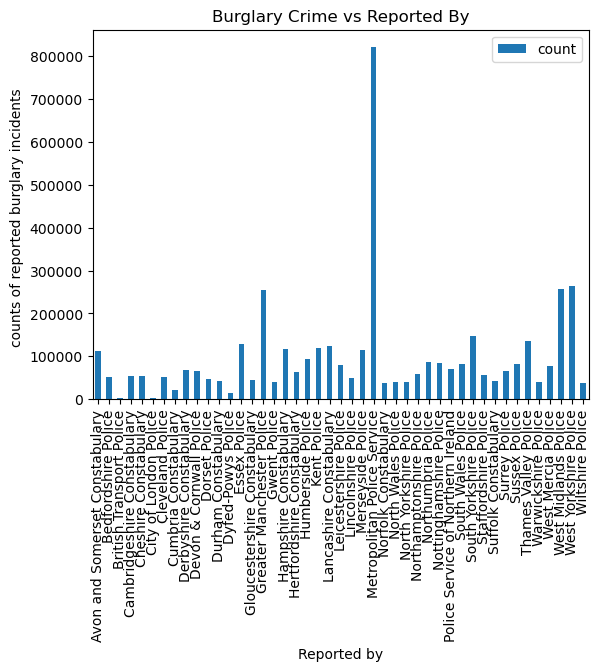

In [31]:
plt.figure(figsize=(10,8))
df_crimes_Burglary_Plot1.filter(col('count') > 0).\
                orderBy(col('Reported by')).\
                toPandas().plot.bar(x='Reported by', y='count')


plt.ylabel('counts of reported burglary incidents ')
plt.title('Burglary Crime vs Reported By')

Text(0.5, 1.0, 'Burglary Crime Trend')

<Figure size 1000x800 with 0 Axes>

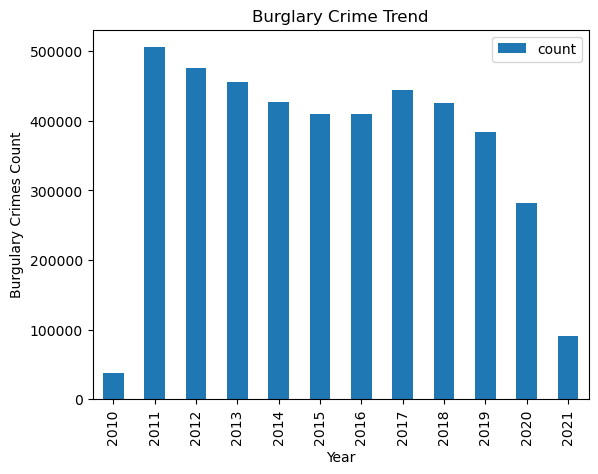

In [32]:
plt.figure(figsize=(10,8))
df_crimes_Burglary_Plot2.filter(col('count') > 0).\
                orderBy(col('Year')).\
                toPandas().plot.bar(x='Year', y='count')


plt.ylabel('Burgulary Crimes Count')
plt.title('Burglary Crime Trend')

<Axes: xlabel='count', ylabel='Density'>

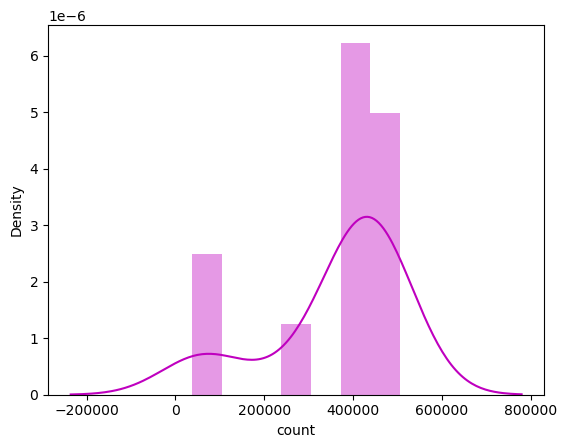

In [33]:
sns.distplot(df_yr_freq['count'] ,color ='m')

Text(0, 0.5, 'Burglary Crime Count')

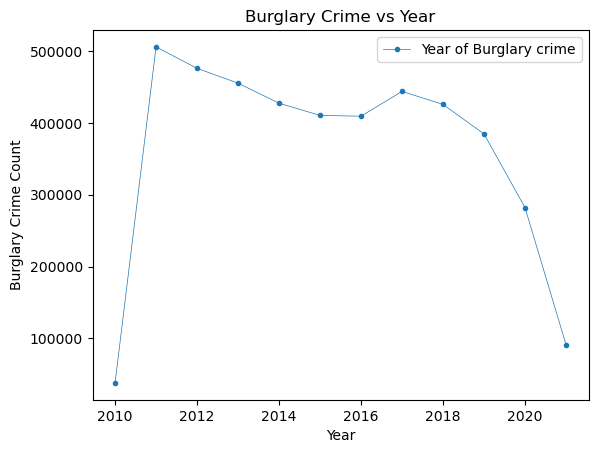

In [34]:
plt.figsize=(40, 6)

df_yr_freq.plot(y='count', x='Year',marker='.', linestyle='-', linewidth=0.5,\
         subplots=False,
              label='Year of Burglary crime',
              title='Burglary Crime vs Year')
plt.ylabel('Burglary Crime Count')

1. The result above with the visualizations shows that Burglary crimes are gradually decreasing

2. Metropolitan Police Service district reported the most Burglary crime

## 5) Selection, application, and reasoning behind use of statistical analysis and multiple evaluation measures   _markdown_, _code_,  _markdown_,

As in the previous section,
1. I explained what i am trying to do (with references)
2. Did the coding and include the results
3. Explained my findings.

#1. Explanation

The aim of this section is to review the dataset, Select burglary crimes and get the count across different reported regions then confirm by gaining insight from the deprivation dataset if the region with most burglary crimes are affluent areas or regarded as affluent areas by leveraging on the deprivation dataset "IMD SCORE". Also, confirm if there is a relationship between Burglary crimes and IMD Score(Level of deprivation).



#2. The Coding




In [35]:
df_pyspark_affluent = df_crimes_Burglary.select('Reported by')

In [36]:
df_pyspark_affluent .select('Reported by').distinct().show()

+--------------------+
|         Reported by|
+--------------------+
|  West Mercia Police|
|Avon and Somerset...|
|   Merseyside Police|
| Bedfordshire Police|
|City of London Po...|
|Cumbria Constabulary|
| Durham Constabulary|
|Devon & Cornwall ...|
| Lincolnshire Police|
|Leicestershire Po...|
|Staffordshire Police|
|British Transport...|
|       Dorset Police|
|South Yorkshire P...|
|West Midlands Police|
|Thames Valley Police|
|       Surrey Police|
|Lancashire Consta...|
|   Humberside Police|
|  South Wales Police|
+--------------------+
only showing top 20 rows



In [37]:
df_pyspark_affluent= df_pyspark_affluent.toPandas()

Metropolitan Police Service           819823
West Yorkshire Police                 264169
West Midlands Police                  255895
Greater Manchester Police             254007
South Yorkshire Police                148031
Thames Valley Police                  135339
Essex Police                          129182
Lancashire Constabulary               123398
Kent Police                           118487
Hampshire Constabulary                116330
Merseyside Police                     114959
Avon and Somerset Constabulary        113257
Humberside Police                      93483
Northumbria Police                     85908
Nottinghamshire Police                 84807
Sussex Police                          83272
South Wales Police                     82094
Leicestershire Police                  80119
West Mercia Police                     77499
Police Service of Northern Ireland     71603
Derbyshire Constabulary                67613
Surrey Police                          66348
Devon & Co

<Axes: xlabel='Reported by', ylabel='count'>

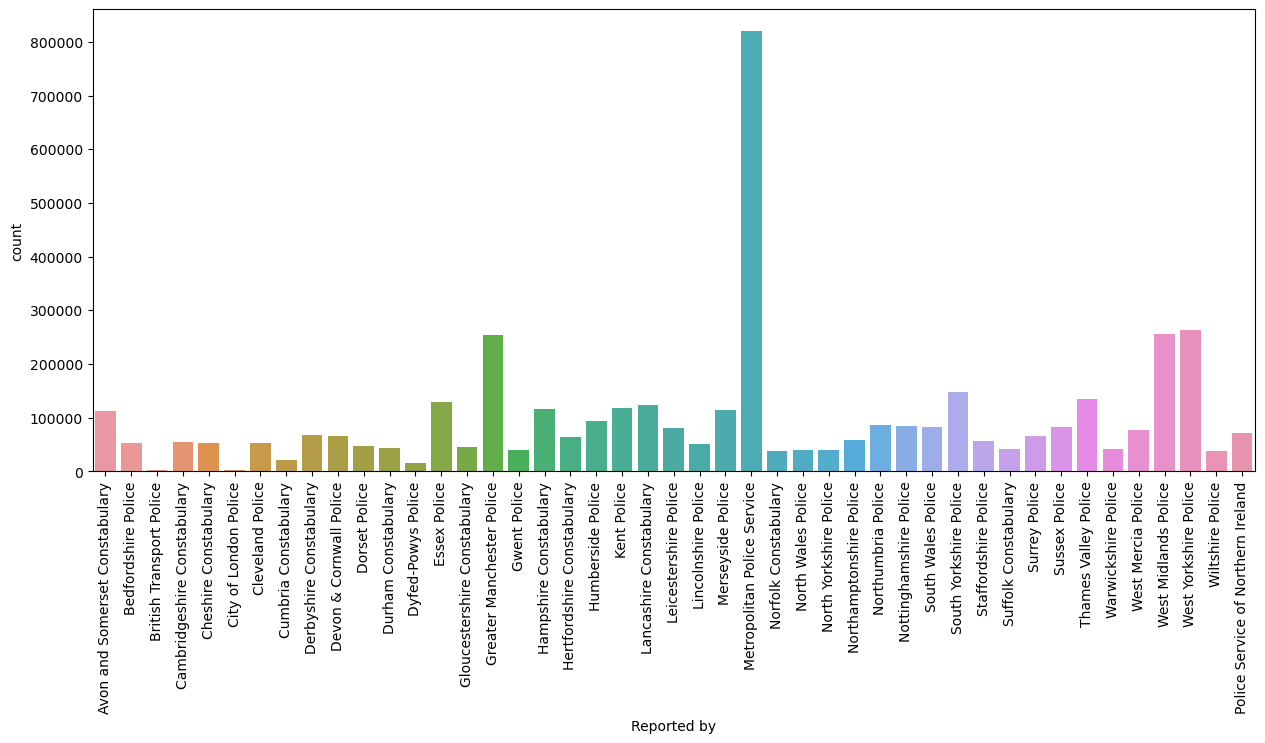

In [38]:
#Showing the Area With The Highest Burglary Crime Using The Burglary Crime Count And Reported By
print(df_pyspark_affluent['Reported by'].value_counts())
plt.figure(figsize = (15,6))
plt.xticks(rotation = 90)
sns.countplot(x = "Reported by", data = df_pyspark_affluent)

In [39]:
#read the Deprivation dataset file into a DataFrame 
df_Deprivation = spark.read.csv("deprivation_with_hdr.gz", header="true",inferSchema="true")


In [40]:
df_Deprivation.printSchema()

root
 |-- LSOA CODE: string (nullable = true)
 |-- PRE 2009 LA CODE: string (nullable = true)
 |-- PRE 2009 LA NAME: string (nullable = true)
 |-- POST 2009 LA CODE: string (nullable = true)
 |-- POST 2009 LA NAME: string (nullable = true)
 |-- GOR CODE: string (nullable = true)
 |-- GOR NAME: string (nullable = true)
 |-- IMD SCORE: double (nullable = true)
 |-- RANK OF IMD SCORE (where 1 is most deprived): integer (nullable = true)
 |-- INCOME SCORE: double (nullable = true)
 |-- RANK OF INCOME SCORE (where 1 is most deprived): integer (nullable = true)
 |-- EMPLOYMENT SCORE: double (nullable = true)
 |-- RANK OF EMPLOYMENT SCORE (where 1 is most deprived): integer (nullable = true)
 |-- HEALTH DEPRIVATION AND DISABILITY SCORE: double (nullable = true)
 |-- RANK OF HEALTH DEPRIVATION AND DISABILITY SCORE (where 1 is most deprived): integer (nullable = true)
 |-- EDUCATION SKILLS AND TRAINING SCORE: double (nullable = true)
 |-- RANK OF EDUCATION SKILLS AND TRAINING SCORE (where 1 is 

In [41]:
df_Deprivation.columns

['LSOA CODE',
 'PRE 2009 LA CODE',
 'PRE 2009 LA NAME',
 'POST 2009 LA CODE',
 'POST 2009 LA NAME',
 'GOR CODE',
 'GOR NAME',
 'IMD SCORE',
 'RANK OF IMD SCORE (where 1 is most deprived)',
 'INCOME SCORE',
 'RANK OF INCOME SCORE (where 1 is most deprived)',
 'EMPLOYMENT SCORE',
 'RANK OF EMPLOYMENT SCORE (where 1 is most deprived)',
 'HEALTH DEPRIVATION AND DISABILITY SCORE',
 'RANK OF HEALTH DEPRIVATION AND DISABILITY SCORE (where 1 is most deprived)',
 'EDUCATION SKILLS AND TRAINING SCORE',
 'RANK OF EDUCATION SKILLS AND TRAINING SCORE (where 1 is most deprived)',
 'BARRIERS TO HOUSING AND SERVICES SCORE',
 'RANK OF BARRIERS TO HOUSING AND SERVICES SCORE (where 1 is most deprived)',
 'CRIME AND DISORDER SCORE',
 'RANK OF CRIME SCORE (where 1 is most deprived)',
 'LIVING ENVIRONMENT SCORE',
 'RANK OF LIVING ENVIRONMENT SCORE (where 1 is most deprived)',
 'Indoors Sub-domain Score',
 'Indoors Sub-domain Rank (where 1 is most deprived)',
 'Outdoors Sub-domain Score',
 'Outdoors Sub-doma

In [42]:
# Select Only The Relevant Columns Then Display
df_Deprivation_1=df_Deprivation.select('LSOA CODE','IMD SCORE',  'INCOME SCORE')
df_Deprivation_1.show()

+---------+---------+------------+
|LSOA CODE|IMD SCORE|INCOME SCORE|
+---------+---------+------------+
|E01000001|     6.16|        0.01|
|E01000002|     5.59|        0.01|
|E01000003|    13.29|        0.07|
|E01000004|    11.17|        0.04|
|E01000005|    21.36|        0.16|
|E01000006|    17.08|        0.12|
|E01000007|    37.24|        0.27|
|E01000008|    45.22|         0.4|
|E01000009|    29.41|         0.2|
|E01000010|    38.45|        0.32|
|E01000011|    29.48|        0.23|
|E01000012|    37.34|        0.33|
|E01000013|     39.8|        0.28|
|E01000014|    37.83|        0.28|
|E01000015|    38.81|        0.34|
|E01000016|    31.64|        0.23|
|E01000017|    35.34|        0.29|
|E01000018|    32.63|        0.25|
|E01000019|    32.85|        0.28|
|E01000020|    34.19|        0.26|
+---------+---------+------------+
only showing top 20 rows



In [43]:
# Joining the Deprivation And Allcrime Dataset
Deprivation_Burglary= df_Deprivation_1.join(df_crimes_Burglary,on="LSOA code")
Deprivation_Burglary.show()

+---------+---------+------------+----------+--------------------+--------------------+--------------------+----+
|LSOA CODE|IMD SCORE|INCOME SCORE|Crime type|           LSOA name|         Reported by|            location|Year|
+---------+---------+------------+----------+--------------------+--------------------+--------------------+----+
|E01014399|    12.16|        0.08|  Burglary|Bath and North Ea...|Avon and Somerset...|On or near Charlt...|2010|
|E01014399|    12.16|        0.08|  Burglary|Bath and North Ea...|Avon and Somerset...|On or near St. Fr...|2010|
|E01014400|     13.1|        0.07|  Burglary|Bath and North Ea...|Avon and Somerset...|On or near Back Lane|2010|
|E01014400|     13.1|        0.07|  Burglary|Bath and North Ea...|Avon and Somerset...|On or near High S...|2010|
|E01014400|     13.1|        0.07|  Burglary|Bath and North Ea...|Avon and Somerset...|On or near High S...|2010|
|E01014400|     13.1|        0.07|  Burglary|Bath and North Ea...|Avon and Somerset...|O

In [44]:


avg_deprivation_burglary = Deprivation_Burglary.groupBy("Reported by", "Crime type").agg(avg('IMD SCORE').alias("Avg Deprivation Score"))

avg_deprivation_burglary.show()





+--------------------+----------+---------------------+
|         Reported by|Crime type|Avg Deprivation Score|
+--------------------+----------+---------------------+
|Cheshire Constabu...|  Burglary|    21.63231191357969|
|       Sussex Police|  Burglary|    21.78129522996156|
|Suffolk Constabulary|  Burglary|   18.361426253886968|
|Staffordshire Police|  Burglary|    25.25754990138021|
|        Essex Police|  Burglary|   19.717861194101197|
|Nottinghamshire P...|  Burglary|    27.59673194270602|
|Gloucestershire C...|  Burglary|   16.805479317826883|
|    Cleveland Police|  Burglary|   38.958412261029906|
|Avon and Somerset...|  Burglary|    20.32289143598468|
|         Kent Police|  Burglary|   21.729390184600682|
|    Wiltshire Police|  Burglary|   15.816878225693243|
|   Merseyside Police|  Burglary|   38.747780435152215|
|  Dyfed-Powys Police|  Burglary|   23.609545454545465|
|Hertfordshire Con...|  Burglary|    12.59065150365648|
|  North Wales Police|  Burglary|   13.331290322

In [45]:
avg_deprivation_burglary_sorted = avg_deprivation_burglary.orderBy(desc("Avg Deprivation Score"))

avg_deprivation_burglary_sorted.show()

+--------------------+----------+---------------------+
|         Reported by|Crime type|Avg Deprivation Score|
+--------------------+----------+---------------------+
|    Cleveland Police|  Burglary|   38.958412261029906|
|   Merseyside Police|  Burglary|   38.747780435152215|
|West Midlands Police|  Burglary|    34.32852830267094|
|Lancashire Consta...|  Burglary|    33.79751331333068|
|Greater Mancheste...|  Burglary|   32.783714929216394|
|   Humberside Police|  Burglary|   32.683088367997655|
|  Northumbria Police|  Burglary|    31.78400611695689|
|South Yorkshire P...|  Burglary|     31.7545341808421|
| Durham Constabulary|  Burglary|   30.766023587578257|
|West Yorkshire Po...|  Burglary|   29.939743126703924|
|Nottinghamshire P...|  Burglary|    27.59673194270602|
|Cumbria Constabulary|  Burglary|    26.38348082872463|
|British Transport...|  Burglary|   25.926209939619238|
|Metropolitan Poli...|  Burglary|    25.92484755043885|
|Devon & Cornwall ...|  Burglary|   25.375663224

In [46]:
avg_deprivation_burglary_sorted.head(10)

[Row(Reported by='Cleveland Police', Crime type='Burglary', Avg Deprivation Score=38.958412261029906),
 Row(Reported by='Merseyside Police', Crime type='Burglary', Avg Deprivation Score=38.747780435152215),
 Row(Reported by='West Midlands Police', Crime type='Burglary', Avg Deprivation Score=34.32852830267094),
 Row(Reported by='Lancashire Constabulary', Crime type='Burglary', Avg Deprivation Score=33.79751331333068),
 Row(Reported by='Greater Manchester Police', Crime type='Burglary', Avg Deprivation Score=32.783714929216394),
 Row(Reported by='Humberside Police', Crime type='Burglary', Avg Deprivation Score=32.683088367997655),
 Row(Reported by='Northumbria Police', Crime type='Burglary', Avg Deprivation Score=31.78400611695689),
 Row(Reported by='South Yorkshire Police', Crime type='Burglary', Avg Deprivation Score=31.7545341808421),
 Row(Reported by='Durham Constabulary', Crime type='Burglary', Avg Deprivation Score=30.766023587578257),
 Row(Reported by='West Yorkshire Police', Cri

In [47]:
#Show the Reported by with the Avg Deprivation Score
avg_deprivation_burglary_sorted_1 = avg_deprivation_burglary.orderBy(asc("Avg Deprivation Score"))
avg_deprivation_burglary_sorted_1.show()

+--------------------+----------+---------------------+
|         Reported by|Crime type|Avg Deprivation Score|
+--------------------+----------+---------------------+
|       Surrey Police|  Burglary|     9.30289021680846|
|Hertfordshire Con...|  Burglary|    12.59065150365648|
|  North Wales Police|  Burglary|   13.331290322580642|
|Thames Valley Police|  Burglary|   14.209524459331046|
|    Wiltshire Police|  Burglary|   15.816878225693243|
|North Yorkshire P...|  Burglary|    16.20141439959507|
| Warwickshire Police|  Burglary|   16.358362354258396|
|Gloucestershire C...|  Burglary|   16.805479317826883|
|City of London Po...|  Burglary|   16.884503311258182|
|        Gwent Police|  Burglary|   17.854833333333335|
|Cambridgeshire Co...|  Burglary|    17.94261446256697|
|Hampshire Constab...|  Burglary|   18.066125657303175|
|Suffolk Constabulary|  Burglary|   18.361426253886968|
|  South Wales Police|  Burglary|                18.41|
|        Essex Police|  Burglary|   19.717861194

In [48]:
avg_deprivation_burglary_sorted_1.head(10)

[Row(Reported by='Surrey Police', Crime type='Burglary', Avg Deprivation Score=9.30289021680846),
 Row(Reported by='Hertfordshire Constabulary', Crime type='Burglary', Avg Deprivation Score=12.59065150365648),
 Row(Reported by='North Wales Police', Crime type='Burglary', Avg Deprivation Score=13.331290322580642),
 Row(Reported by='Thames Valley Police', Crime type='Burglary', Avg Deprivation Score=14.209524459331046),
 Row(Reported by='Wiltshire Police', Crime type='Burglary', Avg Deprivation Score=15.816878225693243),
 Row(Reported by='North Yorkshire Police', Crime type='Burglary', Avg Deprivation Score=16.20141439959507),
 Row(Reported by='Warwickshire Police', Crime type='Burglary', Avg Deprivation Score=16.358362354258396),
 Row(Reported by='Gloucestershire Constabulary', Crime type='Burglary', Avg Deprivation Score=16.805479317826883),
 Row(Reported by='City of London Police', Crime type='Burglary', Avg Deprivation Score=16.884503311258182),
 Row(Reported by='Gwent Police', Crime

In [49]:
avg_deprivation_burglary_IMD_freq = avg_deprivation_burglary.toPandas()

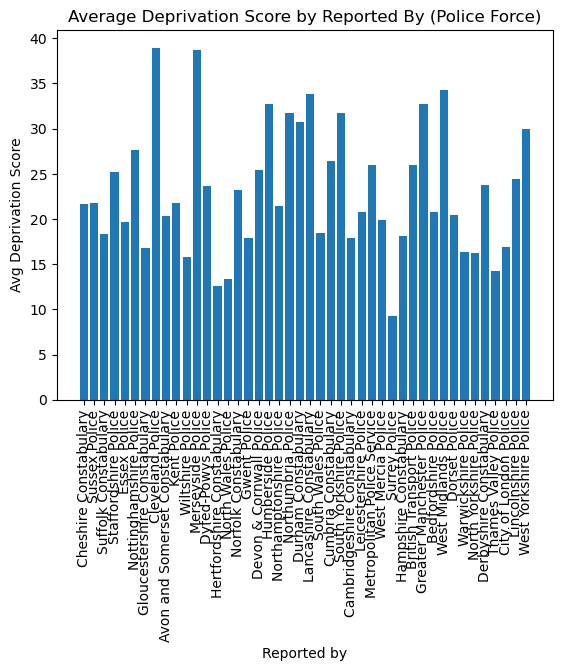

In [50]:
# create a bar chart
plt.bar(avg_deprivation_burglary_IMD_freq['Reported by'], avg_deprivation_burglary_IMD_freq['Avg Deprivation Score'])
plt.xticks(rotation=90)
plt.xlabel('Reported by')
plt.ylabel('Avg Deprivation Score')
plt.title('Average Deprivation Score by Reported By (Police Force)')
plt.show()

In [51]:
# Grouping by "Reported By" and counting the occurrences of "Burglary Crime type"

burglary_count_by_reported_by = Deprivation_Burglary.groupBy("Reported by").agg(
    count("Crime type").alias("Burglary Count"))


In [52]:
# Grouping by "Reported By" and calculating the average IMD SCORE
avg_deprivation_score_by_reported_by = Deprivation_Burglary.groupBy("Reported by").agg(
    avg('IMD SCORE').alias("Avg Deprivation Score")
)



In [53]:
# Joining the two DataFrames on "Reported By"
avg_deprivation_burglary_count = burglary_count_by_reported_by.join(
    avg_deprivation_score_by_reported_by, "Reported by", "inner"
)



In [54]:
#Sorting the DataFrame by "Burglary Count" in descending order
avg_deprivation_burglary_count = avg_deprivation_burglary_count.orderBy(desc("Burglary Count"))



In [55]:
# Show the avg_deprivation_burglary_count DataFrame Capturing Reported by, Burglary Count & Avg Deprivation Score
avg_deprivation_burglary_count.show()



+--------------------+--------------+---------------------+
|         Reported by|Burglary Count|Avg Deprivation Score|
+--------------------+--------------+---------------------+
|Metropolitan Poli...|        778323|    25.92484755043885|
|West Yorkshire Po...|        244206|   29.939743126703924|
|West Midlands Police|        241850|    34.32852830267094|
|Greater Mancheste...|        237983|   32.783714929216394|
|South Yorkshire P...|        134827|     31.7545341808421|
|        Essex Police|        125182|   19.717861194101197|
|Thames Valley Police|        120915|   14.209524459331046|
|Lancashire Consta...|        115298|    33.79751331333068|
|         Kent Police|        111050|   21.729390184600682|
|Hampshire Constab...|        110109|   18.066125657303175|
|   Merseyside Police|        107458|   38.747780435152215|
|Avon and Somerset...|         97104|    20.32289143598468|
|   Humberside Police|         90870|   32.683088367997655|
|  Northumbria Police|         82067|   

In [56]:
# Leveraged The Deprivation Level Thresholds and Categories of The UK Index of Multiple Deprivation (IMD) In Use At 2021

# Added a new column 'Deprivation Level' based on Avg Deprivation Score
avg_deprivation_burglary_count_with_level = avg_deprivation_burglary_count.withColumn(
    'Deprivation Level',
    when(col('Avg Deprivation Score') <= 10, 'Highly Deprived')
    .when(col('Avg Deprivation Score') <= 30, 'Moderately Deprived')
    .when(col('Avg Deprivation Score') <= 50, 'Less Deprived')
    .otherwise('Least Deprived')
)

# Show the DataFrame with the new column
avg_deprivation_burglary_count_with_level.show()

+--------------------+--------------+---------------------+-------------------+
|         Reported by|Burglary Count|Avg Deprivation Score|  Deprivation Level|
+--------------------+--------------+---------------------+-------------------+
|Metropolitan Poli...|        778323|    25.92484755043885|Moderately Deprived|
|West Yorkshire Po...|        244206|   29.939743126703924|Moderately Deprived|
|West Midlands Police|        241850|    34.32852830267094|      Less Deprived|
|Greater Mancheste...|        237983|   32.783714929216394|      Less Deprived|
|South Yorkshire P...|        134827|     31.7545341808421|      Less Deprived|
|        Essex Police|        125182|   19.717861194101197|Moderately Deprived|
|Thames Valley Police|        120915|   14.209524459331046|Moderately Deprived|
|Lancashire Consta...|        115298|    33.79751331333068|      Less Deprived|
|         Kent Police|        111050|   21.729390184600682|Moderately Deprived|
|Hampshire Constab...|        110109|   

In [57]:
# Convert the DataFrame to a Pandas DataFrame
pdf = avg_deprivation_burglary_count.toPandas()



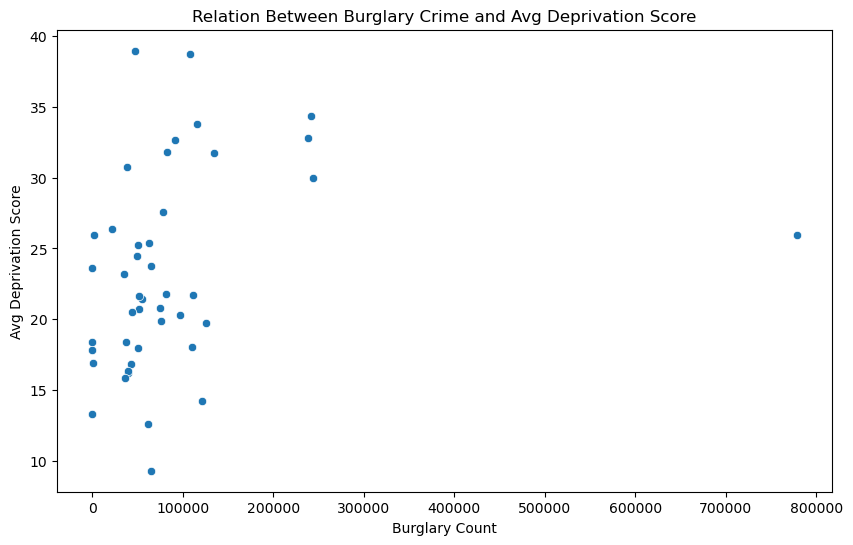

In [58]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pdf, x='Burglary Count', y='Avg Deprivation Score')
plt.title('Relation Between Burglary Crime and Avg Deprivation Score')
plt.xlabel('Burglary Count')
plt.ylabel('Avg Deprivation Score')
plt.show()

In [59]:
# Calculate the correlation coefficient
correlation_coefficient = pdf['Burglary Count'].corr(pdf['Avg Deprivation Score'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.2673814749532026


In [60]:
# Calculate the correlation between "Burglary Count" and "Avg Deprivation Score"
correlation_matrix = pdf[['Burglary Count', 'Avg Deprivation Score']].corr()



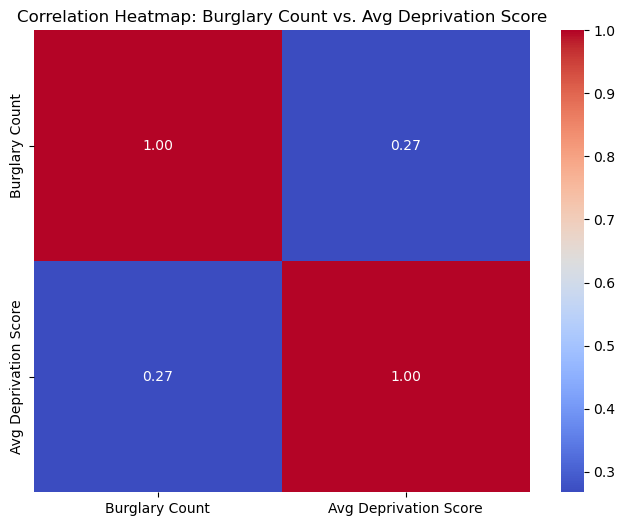

In [61]:

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Burglary Count vs. Avg Deprivation Score')
plt.show()

#3. Findings

The analysis carried out on the datasets revealed that areas under the 'Metropolitan Police Service district or jurisdiction have the highest reported burglary incidents and are known as a moderately deprived and non-ffluent areas based on the IMD SCORE of 25 from the deprivation dataset, while 'The City of London Police' had the least reported incidents. 
Also, the scatter plot and heatmap with correlation coefficient of 0.27 shows that "Burglary Count" and "Avg Deprivation Score" have a weak positive correlation. This indicates that there is a small tendency for regions with more incidents of burglary to have somewhat higher average deprivation scores. 





## 6) Detailed Analysis and consideration of the appropriateness of the solution for the initial problem  _markdown_

This is the discussion section of my report. I critically consider the advantages, disadvantages, and limitations of the methods used. 

The amount of data being generated every day is rapidly increasing, surpassing the capacity of data storage to keep up. Data can come in various forms, including text, images, videos, and audio, and they require different formats and extensions for storage. Data is a critical element for decision-making, and companies are realizing its importance for supporting their strategies. The massive, diverse digital data produced by businesses and individuals is commonly referred to as "Big Data" due to its substantial volume, numerous forms, and fast processing, which necessitate more complex and specialized computer storage and analysis capabilities.

When dealing with enormous amounts of data, only a few techniques and tools are available for their management and manipulation for decision-making. Cloud computing is a popular technological tool for this purpose, providing an effective method for organizing and distributing vast amounts of data and resources over the internet. This technology offers several infrastructure components that enable efficient data handling (Riahi, 2018; Okhuoya et al., 2022)

This project involves utilizing Azure as an Infrastructure as a Service and setting up an Ubuntu operating system. Additionally, various analytical tools and libraries such as Python, PySpark, Pandas, and Java are being installed to aid in the analysis of the data.



Advantages

Manipulating vast amounts of data
Cost-effectiveness.
Secure storage
Data visualisation is a powerful tool for displaying outcomes.
Azure can be accessed using a computer with a standard configuration.
A sizable community for problem resolution.


Disadvatages

Although there is a free trial when an account is created, it is not free.
Setting it up is difficult.
The environment setup requires a user with minimum computer experience.
All infrastructure will be impacted if the virtual machine has any problems.
Only a reliable internet connection is required for cloud computing.


Limitations

The requirement for a reliable internet connection and the difficulty of setup for new users















## 7) Evaluation and Conclusion  _markdown_, 

In the conclusion i  considered my initial aim and objectives and discussed my findings. Specifically i needed to advice my client "insurance company".

Evaluation and conclusion

The study uses Python, PySpark, and Azure as the infrastructure as a service to analyse large amounts of crime data with two questions to answer;

1.Whether there are more burglaries in more affluent areas

2.Burglaries are increasing, decreasing, or are stable   

Jupyter Notebook was used as the text editor when writing the code. The enormous samples in the dataset were processed quickly in the cloud. A number of data visualisation techniques were used. 

The approach for this project was to explore the dataset and then draw out the distinct conclusion and findings that satisfy the above questions.

From the analysis conducted on the dataset, I was able to answer all the questions that were raised as it was revealed that areas under the 'Metropolitan Police Service district or jurisdiction have the highest reported burglary incidents and are known as moderately deprived and non-affluent areas based on the IMD SCORE of 25 from the deprivation dataset, while 'The City of London Police 'had the least reported cases. Also, burglary is the crime with the most occurence and is gradually decreasing though there was a relatively large increase in the number of reported incidents of burglary from 2010 to 2011, it was followed by a gradual decrease from 2012 to 2016 with a slight increase in 2017 and continual decrease between 2018 and 2019 and a significant drop in the number of reported incidents in 2020 and 2021. 

This trend is consistent with reports from other sources that suggest crime rates in general, and burglary rates in particular, decreased in many parts of the world during the COVID-19 pandemic due to factors such as increased police presence, changes in offender behavior, and changes in social and economic conditions,the use of social media to report crime, CCTV, rapid response of the police, security awareness, and sensitization. 

Also, there is a weak positive correlation between "Burglary Count" and "Avg Deprivation Score" with a correlation coefficient of 0.27, this indicates that there is a small tendency for regions with more incidents of burglary to have somewhat higher average deprivation scores.





Recommendation

One effective recommendation for an insurance company dealing with a wide range of client information is to utilize cloud computing, which can securely store and process large amounts of data regardless of size. This technology can be accessed globally, as long as proper access is granted, and can facilitate data analysis to extract valuable insights about the company.

According to the analysis' conclusions, the insurance provider might take into account the following recommendations:

Since the Metropolitan Police Service district or jurisdiction reported the highest number of burglary crimes, it is important to assess the risk and premiums associated with those properties to make sure their prices are fair and reflect the increased risk.

Offer insurance coverage with affordable prices to residences in the City of London Police district or jurisdiction, which had the fewest burglaries reported as a crime.

Consider offering insurance policies that cover damages resulting from burglaries for properties located in areas with higher rates of reported burglary crimes.

Maintain a close eye on the pattern of reported burglary incidents in the dataset and make appropriate adjustments to the risk assessment and insurance rates.


## 8) References and Citation _markdown_



References:


A. Gandomi and M. Haider, ‘‘Beyond the hype: Big data concepts, methods, and analytics,’’ Int. J. Inf. Manage., vol. 35, no. 2, pp. 137–144, Apr. 2015.

Crowe, T. D., & Sutherland, E. H. (2013). Crime prevention through environmental design: Applications of architectural design and space management concepts. Elsevier.

Ekblom, P. (1997). The preventive potential of environmental design. In T. Hope & R. Sparks (Eds.), Crime, risk and justice: The politics of crime control in liberal democracies (pp. 163-184). Willan Publishing.

H. Adel, M. Salheen, and R. Mahmoud, "Crime in relation to urban design. Case study: the greater Cairo region," Ain Shams Eng. J., vol. 7, no. 3, pp. 925-938, 2016.

H. Hassani, X. Huang, M. Ghodsi, and E. S. Silva, ‘‘A review of datamining applications in crime,’’ Stat. Anal. Data Mining, ASA Data Sci. J., vol. 9, no. 3, pp. 139–154, Apr. 2016.

M. Feng et al., "Big Data Analytics and Mining for Effective Visualization and Trends Forecasting of Crime Data," in IEEE Access, vol. 7, pp. 106111-106123,2019.

M. Huda, A. Maseleno, M. Siregar, R. Ahmad, K. A. Jasmi, N. H. N. Muhamad, and P. Atmotiyoso, ‘‘Big data emerging technology: Insights into innovative environment for online learning resources,’’ Int.J. Emerg. Technol. Learn., vol. 13, no. 1, pp. 23–36, Jan. 2018.

Okhuoya, Bonaventure & Uzoma, Benneth. (2022). Cloud computing

Qianwen Wang, Zhutian Chen, Yong Wang (2021), and Huamin Qu A Survey on ML4VIS: Applying Machine Learning Advances to 
Data Visualization

Riahi, Youssra. (2018). Big Data and Big Data Analytics: Concepts, Types and Technologies.

S. Sathyadevan, D. M. S and S. G. S., "Crime analysis and prediction using data mining," 2017 First International Conference on Networks & Soft Computing (ICNSC2014), Guntur,2017, pp.406-412.

U. Thongsatapornwatana, ‘‘A survey of data mining techniques for analyzing crime patterns,’’ in Proc. 2nd Asian Conf. Defence Technol., Chiang Mai, Thailand, 2016, pp. 123–128.

Z. Jia, C. Shen, Y. Chen, T. Yu, X. Guan, and X. Yi, ‘‘Big-data analysis of multi-source logs for anomaly detection on network-based system,’’ in Proc. 13th IEEE Conf. Autom. Sci. Eng. (CASE), Xi’an, China, Aug. 2017, pp. 1136–1141. A. Agresti, An Introduction to Categorical Data Analysis, 3rd ed. Hoboken, NJ, USA: Wiley, 2018.














# RESULTS


1.Burglaries are not more in more affluent areras rather there are more burglaries in moderately deprived and non-affluent areas


2.It appears that the number of reported incidents of burglary increased significantly from 2010 to 2011 and then gradually decreased from 2012 to 2016 with a slight increase in 2017 and a continual decrease between 2018 to 2021. However,it is important to take note that the drop in reported incidents between 2020 and 2021 was very significant. In conclusion, burglary crime is decreasing.